### Loading Dependencies
***

In [1]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

### Initializing Variables
***

In [3]:
# Target Search Term
target_terms = ("@BBCWorld", "@CBSNews", "@CNNbrk",
                "@FoxNews", "@nytimes")
len_targets = len(target_terms)
save_compound_list = []
save_sentiment = []
save_compound_list_with_date = []
counter = 0
y_axis = np.arange(0,100,1)
sentiment_array = []

### Twitter API Auth Steps
***

In [4]:
# Twitter API Keys
consumer_key = 'ibYsFmAdHS8fhnupeA3opTRHN'
consumer_secret = 'cSfliluzlYkSJ8EPJEOvQA5kKG9BE6MG1ddF8kHAyNc5ZJ6601'
access_token = '943311356534472704-3tToKzZ2RMDtNOo4frlY6IEAg6iWGL1'
access_token_secret = '42jS6EeOwV5ZaWde0LwxpL4dPyozVt5rv3URu7ZlP9m17'

In [5]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [7]:
# Loop through all target users
for target in target_terms:

    # Variables for holding sentiments
    compound_list = []
    compound_list_with_date = []
    positive_list = []
    negative_list = []
    neutral_list = []


    # Using a loop to manage iteration thru each user
    if counter <= len_targets:

        # Use API to grab 100 tweets
        public_tweets = api.user_timeline(target, count=100)

        
        # Loop through all tweets
        for tweet in public_tweets:
            
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]

            
            compound_list.append(compound)
            compound_list_with_date.append(compound)
            compound_list_with_date.append(tweet['created_at'])
            compound_list_with_date.append(target)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

    
    sentiment = {"User": target,
                 "Compound": np.mean(compound_list),
                 "Positive": np.mean(positive_list),
                 "Neutral": np.mean(negative_list),
                 "Negative": np.mean(neutral_list),
                 "Tweet Count": len(compound_list)}

    save_sentiment.append(sentiment)
    save_compound_list.append(compound_list)
    save_compound_list_with_date.append(compound_list_with_date)
    counter = counter + 1


### Getting the dataframes ready for plotting
***

In [41]:
# Using the transpose function to make the rows columns
compound_df = pd.DataFrame(save_compound_list)
compound_df = compound_df.transpose()
compound_df.head()

,0,1,2,3,4
0,-0.6486,0.1779,-0.4404,-0.6705,0.0000
1,0.3412,-0.6908,0.4973,0.5719,-0.3818
2,0.0000,-0.6705,0.2960,0.6908,0.0000
3,-0.7783,0.0000,-0.5994,0.4585,0.0000
4,0.0000,-0.1280,-0.7003,-0.0516,-0.2960


In [9]:
# Setting the columns names
compound_df.columns = target_terms
compound_df.head()

,@BBCWorld,@CBSNews,@CNNbrk,@FoxNews,@nytimes
0,-0.6486,0.1779,-0.4404,-0.6705,0.0000
1,0.3412,-0.6908,0.4973,0.5719,-0.3818
2,0.0000,-0.6705,0.2960,0.6908,0.0000
3,-0.7783,0.0000,-0.5994,0.4585,0.0000
4,0.0000,-0.1280,-0.7003,-0.0516,-0.2960


In [10]:
# Creating a 'index' so that plotting is easier
compound_df = compound_df.reset_index()

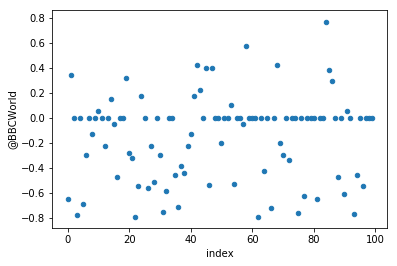

In [11]:
# Plotting one of the users...but I have 5 total users
compound_df.plot(kind='scatter', x='index', y='@BBCWorld', subplots=False)
plt.show()

### Scatter Plotting 'Compound' Sentiment Analysis for ALL Datapoints
***

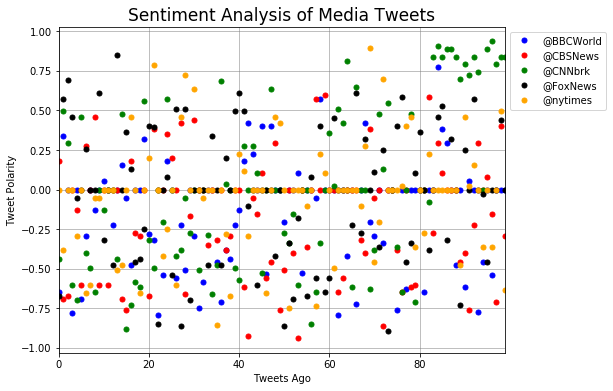

In [12]:
# Using this plotting method given the number of variables/users
# Note that the plot legend is not on the graph
fig, ax = plt.subplots(sharex=True, figsize=(8, 6))
compound_df.plot(x='index', y='@BBCWorld', markersize=5, color='blue', linestyle='none', ax=ax, marker='o')
compound_df.plot(x='index', y='@CBSNews', markersize=5, color='red', linestyle='none', ax=ax, marker='o')
compound_df.plot(x='index', y='@CNNbrk', markersize=5, color='green', linestyle='none', ax=ax, marker='o')
compound_df.plot(x='index', y='@FoxNews', markersize=5, color='black', linestyle='none', ax=ax, marker='o')
compound_df.plot(x='index', y='@nytimes', markersize=5, color='orange', linestyle='none', ax=ax, marker='o')
plt.ylabel("Tweet Polarity", size=10)
plt.grid(True, color='gray', linestyle='-', linewidth=.5)
plt.xlabel("Tweets Ago", size=10)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Sentiment Analysis of Media Tweets', size=17)
plt.show()

### Extra Credit - Plotting TimeSeries Data
***

In [33]:
# This was a neat exercise of learning how to convert a list into a 3 column dataframe
# Using the reshape function is required before the column names can be assigned
compound_wdate_df0 = pd.DataFrame(np.array(save_compound_list_with_date[0]).reshape(100,3), columns = ['Compound', 'Date', 'User'])
compound_wdate_df1 = pd.DataFrame(np.array(save_compound_list_with_date[1]).reshape(100,3), columns = ['Compound', 'Date', 'User'])
compound_wdate_df2 = pd.DataFrame(np.array(save_compound_list_with_date[2]).reshape(100,3), columns = ['Compound', 'Date', 'User'])
compound_wdate_df3 = pd.DataFrame(np.array(save_compound_list_with_date[3]).reshape(100,3), columns = ['Compound', 'Date', 'User'])
compound_wdate_df4 = pd.DataFrame(np.array(save_compound_list_with_date[4]).reshape(100,3), columns = ['Compound', 'Date', 'User'])

In [34]:
compound_sub1 = compound_wdate_df0.append(compound_wdate_df1)

In [35]:
compound_sub2 = compound_wdate_df2.append(compound_wdate_df3)

In [36]:
compound_sub2 = compound_sub2.append(compound_wdate_df4)

In [37]:
compound_final = compound_sub1.append(compound_sub2)

In [38]:
# All of the steps above a needed to build a combined dataframe
# Notice also that the date is a column
compound_final.head()

,Compound,Date,User
0,-0.6486,Mon Jan 15 01:56:42 +0000 2018,@BBCWorld
1,0.3412,Mon Jan 15 01:52:15 +0000 2018,@BBCWorld
2,0.0,Mon Jan 15 01:46:24 +0000 2018,@BBCWorld
3,-0.7783,Mon Jan 15 01:42:25 +0000 2018,@BBCWorld
4,0.0,Mon Jan 15 01:35:38 +0000 2018,@BBCWorld


In [39]:
compound_final['Date'] = pd.to_datetime(compound_final['Date'])

In [40]:
# This step is needed to get the date into the index
# This is required if you want to easily plot the data
compound_final.set_index(['Date'], inplace=True)
compound_final.head()

,Compound,User
Date,,
2018-01-15 01:56:42,-0.6486,@BBCWorld
2018-01-15 01:52:15,0.3412,@BBCWorld
2018-01-15 01:46:24,0.0,@BBCWorld
2018-01-15 01:42:25,-0.7783,@BBCWorld
2018-01-15 01:35:38,0.0,@BBCWorld


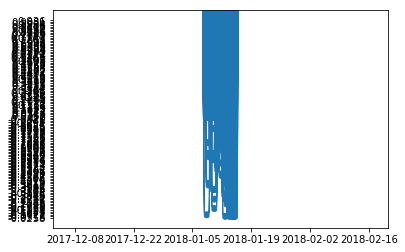

In [21]:
# This graph is the right data but the x and y axis are not on the right scale. Notice the date span on the x axis
# Notice the y axis labels
plt.scatter(compound_final.index, compound_final.Compound)
plt.show()

### Plotting the Average Compound Value for Each User
***

In [44]:
# Creating a sentiment dataframe
# Writing sentiment data to a csv file
sentiment_df = pd.DataFrame(save_sentiment)
sentiment_df.to_csv('sentiment.csv', sep=',', header=True, index=True, index_label=None)
sentiment_df

,Compound,Negative,Neutral,Positive,Tweet Count,User
0,-0.142123,0.81369,0.13182,0.05448,100,@BBCWorld
1,-0.156360,0.84051,0.11656,0.04289,100,@CBSNews
2,0.035990,0.81470,0.08281,0.10250,100,@CNNbrk
3,-0.024568,0.83032,0.09784,0.07186,100,@FoxNews
4,-0.041352,0.86409,0.07588,0.05999,100,@nytimes


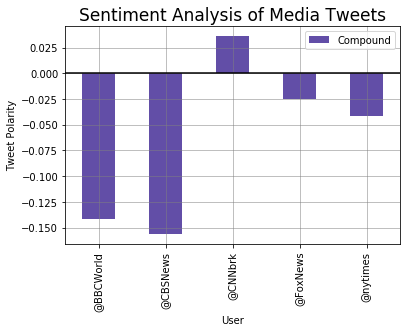

In [25]:
# Note that the colors for each bar are the same
colors = ['#624ea7', 'g', 'yellow', 'k']
sentiment_df.plot.bar(x='User', y='Compound', subplots=False, color=colors)
plt.grid(True, color='gray', linestyle='-', linewidth=.5)
plt.axhline(0, color='k')
plt.ylabel("Tweet Polarity", size=10)
plt.xlabel("User", size=10)
plt.title('Sentiment Analysis of Media Tweets', size=17)
plt.show()

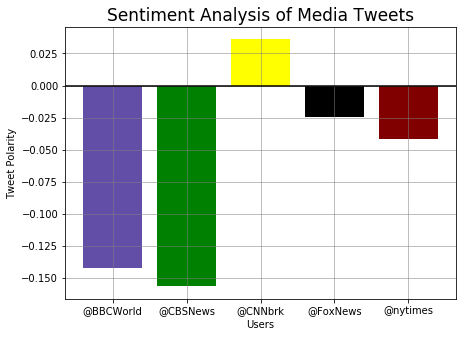

In [48]:
# Using different code to change the color of each bar
# Also notice the highlighted '0' line
n=5
tick_label = sentiment_df['User']
data = sentiment_df['Compound']
fig, ax = plt.subplots(figsize=(7, 5))
bar_locations = np.arange(n)
colors = ['#624ea7', 'g', 'yellow', 'k', 'maroon']
plt.grid(True, color='gray', linestyle='-', linewidth=.5)
plt.axhline(0, color='k')
ax = plt.bar(bar_locations, data, color=colors, tick_label=tick_label)
plt.ylabel("Tweet Polarity", size=10)
plt.xlabel("Users", size=10)
plt.title('Sentiment Analysis of Media Tweets', size=17)
plt.show()

### Extra Credit - Adding a data table to the bottom of my graph
***

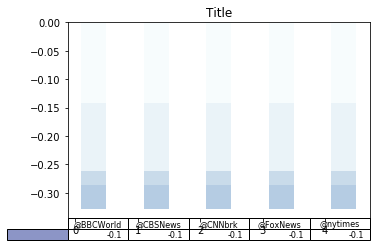

In [55]:
# With more time I would have liked to have experimented with this method
data = sentiment_df['Compound']
columns = target_terms
rows = 'Compound'

values = np.arange(-.175, .150, .025)

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = 1

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % x for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowColours=colors,
                      colLabels=columns)

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

#plt.ylabel("Loss in ${0}'s".format(value_increment))
#plt.yticks(values ['%d' % val for val in values])
#plt.xticks([])
plt.title('Title')
plt.show()

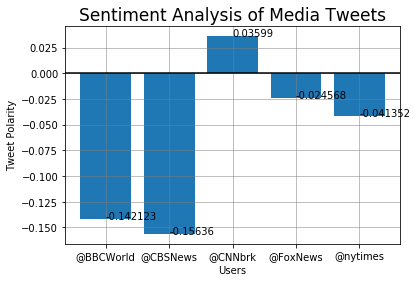

In [58]:
# Adding data labels to the graph using the zip feature
x = sentiment_df['User']
y = sentiment_df['Compound']
plt.bar(x, y)
for a,b in zip(x, y):
    plt.text(a, b, str(b))
colors = ['#624ea7', 'g', 'yellow', 'k', 'maroon']
plt.grid(True, color='gray', linestyle='-', linewidth=.5)
plt.axhline(0, color='k')
plt.ylabel("Tweet Polarity", size=10)
plt.xlabel("Users", size=10)
plt.title('Sentiment Analysis of Media Tweets', size=17)
plt.show()

### Obversations
***

On the surface this appeared to be a relatively straight forward assignment.  There were challenges with graphs (data labels and changing the color of the each bar for example).  There were challenges with the list and dataframes including working with DateTime, index, adding rows to dataframes, etc.

Interesting that only one news agency had a positive sentiment. It would be interesting to do more analysis on the
CBS tweets to determine why this user is far less than 2 of the others...why it's the worse score.

With more time I would have loved to have down more analysis on the positive sentiment tweets to see which words or which subjects generated positive sentiments.